## Imports

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import display
import matplotlib.pyplot as plt
from time import strftime

from sklearn.metrics import confusion_matrix
import os

%matplotlib inline

## Constants


In [2]:
LABEL_NAMES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
IMG_WIDTH=32
IMG_HEIGHT=32
CHANNELS=3
IMG_PIXELS=IMG_WIDTH * IMG_HEIGHT
TOTAL_INPUTS=IMG_PIXELS*CHANNELS
VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000
LOG_DIR = 'tensorboard_cifar_logs/'

## Load the dataset

In [3]:
(x_train_all, y_train_all), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

## Explore the data

In [4]:
x_train_all.shape

(50000, 32, 32, 3)

In [5]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

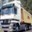

In [6]:
pic=array_to_img(x_train_all[1])
display(pic)

In [7]:
y_train_all.shape

(50000, 1)

In [8]:
y_train_all[1][0]

9

In [9]:
LABEL_NAMES[y_train_all[1][0]]

'truck'

Text(0.5, 0, 'truck')

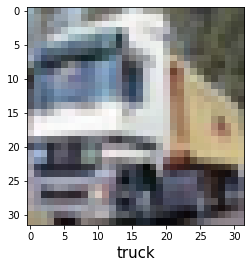

In [10]:
plt.imshow(x_train_all[1])
plt.xlabel(LABEL_NAMES[y_train_all[1][0]], fontsize=15)
#plt.show()

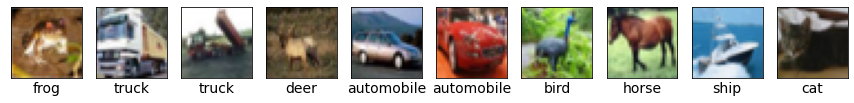

In [11]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [12]:
nr_imgs,x,y,x=x_train_all.shape

In [13]:
nr_imgs


50000

## Preprocess the data

##### -Normalize the input data to get values between 0 and 1.
##### -Reshape the data to get rows of flattened arrays
##### -Create a validation set

In [14]:
x_train_all.shape

(50000, 32, 32, 3)

In [15]:
x_train_all[0][0][0][0]

59

In [16]:
x_train_all=x_train_all /255
x_test=x_test /255

In [17]:
x_train_all=x_train_all.reshape(x_train_all.shape[0],TOTAL_INPUTS)
x_test=x_test.reshape(x_test.shape[0],TOTAL_INPUTS)

In [18]:
x_train_all.shape

(50000, 3072)

In [19]:
x_test.shape

(10000, 3072)

In [20]:
x_val=x_train_all[:VALIDATION_SIZE]
y_val=y_train_all[:VALIDATION_SIZE]

In [21]:
x_train=x_train_all[VALIDATION_SIZE:]
y_train=y_train_all[VALIDATION_SIZE:]

In [22]:
x_val.shape,y_val.shape


((10000, 3072), (10000, 1))

In [23]:
x_train.shape,y_train.shape

((40000, 3072), (40000, 1))

## Defining our neural network using several models

In [24]:
model_1=Sequential([Dense(units=128,input_dim=TOTAL_INPUTS,activation='relu',name='m1_hidden1'),
                    Dense(units=64,activation='relu',name='m1_hidden2'),
                    Dense(units=16,activation='relu',name='m1_hidden3'),
                    Dense(units=10,activation='softmax',name='m1_output')])
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_2=Sequential([Dropout(0.2,seed=42,input_shape=(TOTAL_INPUTS,)),
                    Dense(units=128,activation='relu',name='m2_hidden1'),
                    Dense(units=64,activation='relu',name='m2_hidden2'),
                    Dense(units=15,activation='relu',name='m2_hidden3'),
                    Dense(units=10,activation='softmax',name='m2_output')])
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 m2_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m2_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m2_hidden3 (Dense)          (None, 15)                975       
                                                                 
 m2_output (Dense)           (None, 10)                160       
                                                                 
Total params: 402,735
Trainable params: 402,735
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_3=Sequential([Dropout(0.2,seed=42,input_shape=(TOTAL_INPUTS,)),
                    Dense(units=128,activation='relu',name='m3_hidden1'),
                    Dropout(0.25,seed=42),
                    Dense(units=64,activation='relu',name='m3_hidden2'),
                    Dense(units=15,activation='relu',name='m3_hidden3'),
                    Dense(units=10,activation='softmax',name='m3_output')])
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Tensorboard

In [28]:
def get_tensorboard(model_name):
    folder_name=f'{model_name} at {strftime("%H %M")}'
    
    dir_paths=os.path.join(LOG_DIR,folder_name)
    try:
        os.makedirs(dir_paths)
    except OSError as error:
        print(error.strerror)
    else:
        print('Successfully created directory')
    return TensorBoard(log_dir=dir_paths)
    

In [29]:

x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

In [30]:

samples_per_batch = 1000
nr_epochs=100
model_1.fit(x_train,y_train,batch_size=samples_per_batch,epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1')],validation_data=(x_val,y_val))

Successfully created directory
Epoch 1/100
40/40 [==============================] - 3s 52ms/step - loss: 2.2402 - accuracy: 0.1255 - val_loss: 2.1355 - val_accuracy: 0.1845
Epoch 2/100
40/40 [==============================] - 2s 46ms/step - loss: 2.0984 - accuracy: 0.1999 - val_loss: 2.0359 - val_accuracy: 0.2377
Epoch 3/100
40/40 [==============================] - 2s 43ms/step - loss: 2.0253 - accuracy: 0.2434 - val_loss: 1.9818 - val_accuracy: 0.2555
Epoch 4/100
40/40 [==============================] - 2s 43ms/step - loss: 1.9673 - accuracy: 0.2609 - val_loss: 1.9297 - val_accuracy: 0.2742
Epoch 5/100
40/40 [==============================] - 2s 44ms/step - loss: 1.9281 - accuracy: 0.2776 - val_loss: 1.9011 - val_accuracy: 0.2890
Epoch 6/100
40/40 [==============================] - 2s 47ms/step - loss: 1.8719 - accuracy: 0.3097 - val_loss: 1.8405 - val_accuracy: 0.3229
Epoch 7/100
40/40 [==============================] - 2s 45ms/step - loss: 1.8292 - accuracy: 0.3300 - val_loss: 1.821

40/40 [==============================] - 3s 65ms/step - loss: 1.3350 - accuracy: 0.5225 - val_loss: 1.5139 - val_accuracy: 0.4630
Epoch 59/100
40/40 [==============================] - 3s 67ms/step - loss: 1.3302 - accuracy: 0.5243 - val_loss: 1.4753 - val_accuracy: 0.4803
Epoch 60/100
40/40 [==============================] - 3s 78ms/step - loss: 1.3209 - accuracy: 0.5282 - val_loss: 1.4606 - val_accuracy: 0.4779
Epoch 61/100
40/40 [==============================] - 2s 61ms/step - loss: 1.3185 - accuracy: 0.5262 - val_loss: 1.4832 - val_accuracy: 0.4756
Epoch 62/100
40/40 [==============================] - 2s 56ms/step - loss: 1.3070 - accuracy: 0.5320 - val_loss: 1.4775 - val_accuracy: 0.4722
Epoch 63/100
40/40 [==============================] - 2s 52ms/step - loss: 1.3126 - accuracy: 0.5310 - val_loss: 1.4747 - val_accuracy: 0.4798
Epoch 64/100
40/40 [==============================] - 2s 55ms/step - loss: 1.3104 - accuracy: 0.5317 - val_loss: 1.4636 - val_accuracy: 0.4817
Epoch 65/100

In [31]:
samples_per_batch = 1000
nr_epochs=100
model_2.fit(x_train,y_train,batch_size=samples_per_batch,epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2')],validation_data=(x_val,y_val))

Successfully created directory
Epoch 1/100
40/40 [==============================] - 5s 118ms/step - loss: 2.3004 - accuracy: 0.1326 - val_loss: 2.2642 - val_accuracy: 0.1460
Epoch 2/100
40/40 [==============================] - 4s 105ms/step - loss: 2.2365 - accuracy: 0.1664 - val_loss: 2.1808 - val_accuracy: 0.1966
Epoch 3/100
40/40 [==============================] - 4s 101ms/step - loss: 2.1378 - accuracy: 0.1937 - val_loss: 2.0745 - val_accuracy: 0.2012
Epoch 4/100
40/40 [==============================] - 4s 111ms/step - loss: 2.0413 - accuracy: 0.2375 - val_loss: 1.9825 - val_accuracy: 0.2671
Epoch 5/100
40/40 [==============================] - 5s 116ms/step - loss: 1.9710 - accuracy: 0.2853 - val_loss: 1.9095 - val_accuracy: 0.3126
Epoch 6/100
40/40 [==============================] - 4s 101ms/step - loss: 1.9020 - accuracy: 0.3119 - val_loss: 1.8565 - val_accuracy: 0.3215
Epoch 7/100
40/40 [==============================] - 5s 124ms/step - loss: 1.8564 - accuracy: 0.3257 - val_loss

Epoch 58/100
40/40 [==============================] - 4s 100ms/step - loss: 1.4472 - accuracy: 0.4825 - val_loss: 1.4812 - val_accuracy: 0.4663
Epoch 59/100
40/40 [==============================] - 4s 110ms/step - loss: 1.4469 - accuracy: 0.4808 - val_loss: 1.4797 - val_accuracy: 0.4663
Epoch 60/100
40/40 [==============================] - 4s 104ms/step - loss: 1.4462 - accuracy: 0.4826 - val_loss: 1.4852 - val_accuracy: 0.4673
Epoch 61/100
40/40 [==============================] - 4s 104ms/step - loss: 1.4467 - accuracy: 0.4806 - val_loss: 1.4762 - val_accuracy: 0.4661
Epoch 62/100
40/40 [==============================] - 5s 116ms/step - loss: 1.4454 - accuracy: 0.4833 - val_loss: 1.4684 - val_accuracy: 0.4727
Epoch 63/100
40/40 [==============================] - 6s 149ms/step - loss: 1.4382 - accuracy: 0.4821 - val_loss: 1.4694 - val_accuracy: 0.4709
Epoch 64/100
40/40 [==============================] - 6s 145ms/step - loss: 1.4305 - accuracy: 0.4873 - val_loss: 1.4757 - val_accuracy:

In [32]:
samples_per_batch = 1000
nr_epochs=100
model_3.fit(x_train,y_train,batch_size=samples_per_batch,epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3')],validation_data=(x_val,y_val))

Successfully created directory
Epoch 1/100
40/40 [==============================] - 7s 139ms/step - loss: 2.2678 - accuracy: 0.1485 - val_loss: 2.1347 - val_accuracy: 0.2134
Epoch 2/100
40/40 [==============================] - 6s 148ms/step - loss: 2.0979 - accuracy: 0.2136 - val_loss: 2.0005 - val_accuracy: 0.2608
Epoch 3/100
40/40 [==============================] - 5s 116ms/step - loss: 2.0052 - accuracy: 0.2527 - val_loss: 1.9264 - val_accuracy: 0.2935
Epoch 4/100
40/40 [==============================] - 6s 163ms/step - loss: 1.9532 - accuracy: 0.2779 - val_loss: 1.8720 - val_accuracy: 0.3165
Epoch 5/100
40/40 [==============================] - 6s 144ms/step - loss: 1.9050 - accuracy: 0.3015 - val_loss: 1.8365 - val_accuracy: 0.3301
Epoch 6/100
40/40 [==============================] - 5s 129ms/step - loss: 1.8759 - accuracy: 0.3181 - val_loss: 1.8049 - val_accuracy: 0.3544
Epoch 7/100
40/40 [==============================] - 5s 125ms/step - loss: 1.8479 - accuracy: 0.3331 - val_loss

Epoch 58/100
40/40 [==============================] - 5s 123ms/step - loss: 1.5437 - accuracy: 0.4439 - val_loss: 1.4790 - val_accuracy: 0.4781
Epoch 59/100
40/40 [==============================] - 5s 119ms/step - loss: 1.5413 - accuracy: 0.4459 - val_loss: 1.4744 - val_accuracy: 0.4813
Epoch 60/100
40/40 [==============================] - 4s 110ms/step - loss: 1.5378 - accuracy: 0.4511 - val_loss: 1.4673 - val_accuracy: 0.4844
Epoch 61/100
40/40 [==============================] - 4s 104ms/step - loss: 1.5357 - accuracy: 0.4475 - val_loss: 1.4618 - val_accuracy: 0.4793
Epoch 62/100
40/40 [==============================] - 4s 112ms/step - loss: 1.5364 - accuracy: 0.4471 - val_loss: 1.4638 - val_accuracy: 0.4802
Epoch 63/100
40/40 [==============================] - 4s 101ms/step - loss: 1.5308 - accuracy: 0.4516 - val_loss: 1.4670 - val_accuracy: 0.4855
Epoch 64/100
40/40 [==============================] - 4s 103ms/step - loss: 1.5352 - accuracy: 0.4498 - val_loss: 1.4555 - val_accuracy:

## Predictions

In [33]:
x_val[4].shape

(3072,)

In [34]:
x_val.shape

(10000, 3072)

In [35]:
test = np.expand_dims(x_val[4], axis=0)

In [36]:
np.set_printoptions(precision=3)
pred=model_2.predict(test)
pred_class=np.argmax(pred,axis=-1)
pred

array([[4.328e-02, 2.456e-01, 5.247e-04, 4.322e-04, 1.871e-03, 1.970e-04,
        3.760e-05, 9.373e-04, 6.267e-01, 8.043e-02]], dtype=float32)

In [37]:
pred_class

array([8], dtype=int64)

In [38]:
y_val[0]

array([6], dtype=uint8)

In [39]:
for i in range(10):
    y_true=y_val[i][0]
    img_test=np.expand_dims(x_val[i],axis=0)
    
    y_pred = np.argmax(model_2.predict(img_test)[0], axis=-1)
    print(f'Actual value is: {y_true} vs predicted value of: {y_pred}')

Actual value is: 6 vs predicted value of: 6
Actual value is: 9 vs predicted value of: 1
Actual value is: 9 vs predicted value of: 9
Actual value is: 4 vs predicted value of: 6
Actual value is: 1 vs predicted value of: 8
Actual value is: 1 vs predicted value of: 9
Actual value is: 2 vs predicted value of: 2
Actual value is: 7 vs predicted value of: 7
Actual value is: 8 vs predicted value of: 8
Actual value is: 3 vs predicted value of: 9


## Evaluation

In [40]:
model_2.metrics_names
x_test.shape,y_test.shape


((10000, 3072), (10000, 1))

In [41]:
test_loss,test_accuracy=model_2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4502 - accuracy: 0.4879


In [42]:
print(f' Test loss is: {test_loss:0.3} and test accuracy is: {test_accuracy:0.1%}')

 Test loss is: 1.45 and test accuracy is: 48.8%


In [51]:
x_test.shape,y_test.shape

((10000, 3072), (10000, 1))

In [56]:
pr=model_2.predict(x_test)
p=np.argmax(pr,axis=-1)
p

array([3, 8, 8, ..., 5, 6, 7], dtype=int64)

In [57]:

pred_y=np.argmax(model_2.predict(x_test),axis=-1)
conf_mat=confusion_matrix(y_test,pred_y)

In [61]:
true_pos=np.diag(conf_mat)
recall=true_pos/np.sum(conf_mat,axis=1)  #recall=true pos/(true pos + true neg)
precision=true_pos/np.sum(conf_mat,axis=0)      #precision=true pos/(true pos+false neg)       

In [64]:
avg_recall=recall.mean()
avg_recall

0.48790000000000006

In [63]:
avg_prec=precision.mean()

In [65]:
avg_prec

0.4939487528655498

In [70]:
f1_score=2 *avg_recall*avg_prec/(avg_recall+avg_prec)

In [71]:
f1_score

0.4909057445349792